In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.utils import resample

#For modeling
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
%matplotlib inline

## Here is a dataset from Kaggle which has 29 features and the type of transaction for a credit card dataset. 
## The objective is to detect a pattern in the fraudulent transactions and build a system that helps detect a fraudulent transaction with maximum accuracy!

In [2]:
df = pd.read_csv("C:/Users/Aditya/Desktop/BSE PGPDA/SEM 1/Chirag Sir/Fraud Detection Data/archive (7)/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#We have a clean and complete dataset
#lets take a look at how our variables distrbuted with each other 

#User defined function to plot distribution of all our columns
def display_distribution_plots(df):
    for col in df.columns:
        sns.distplot(df[col].dropna())
        plt.title(f"Distribution Plot for Column: {col}")
        plt.xlabel("Values")
        plt.ylabel("Density")
        plt.show()

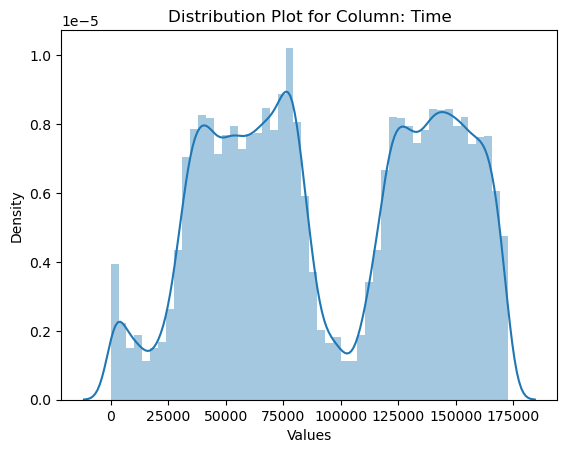

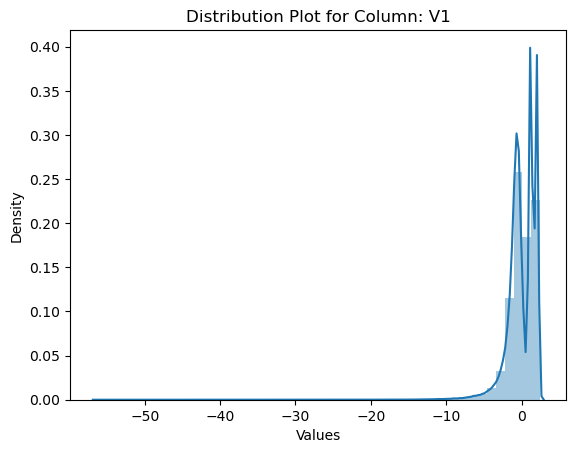

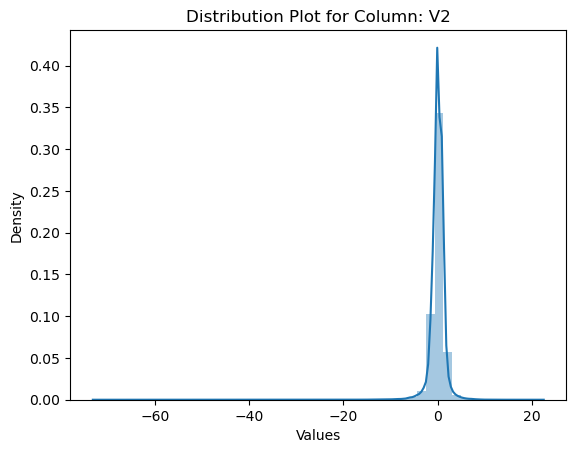

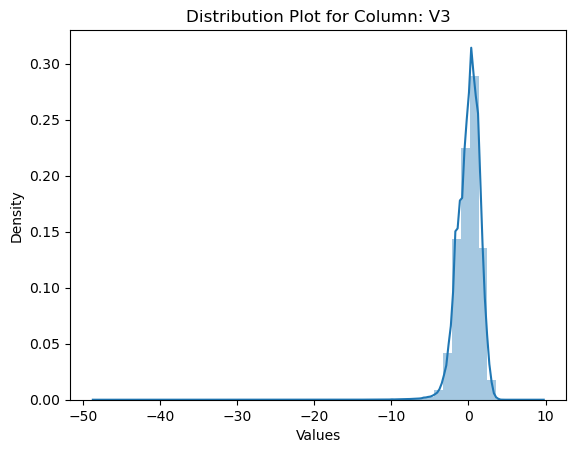

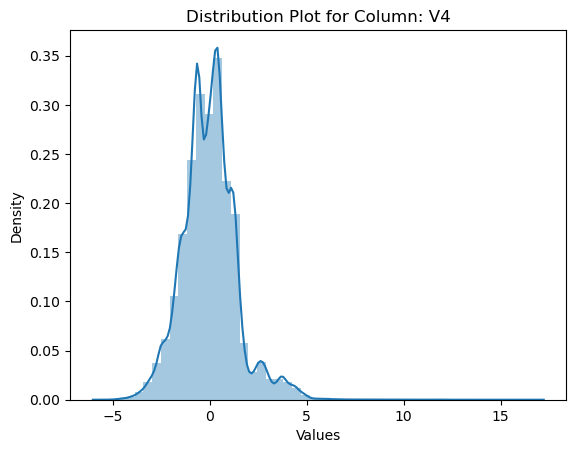

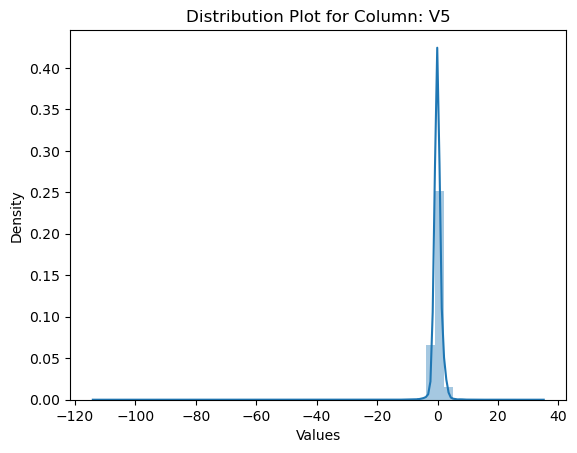

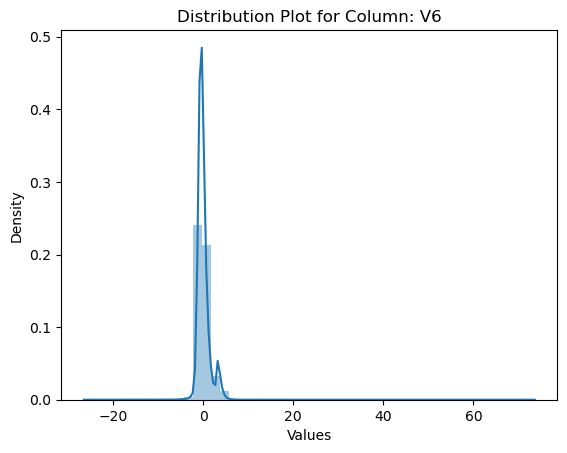

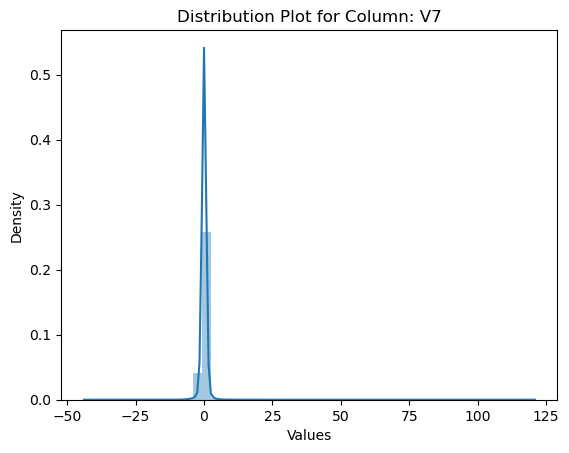

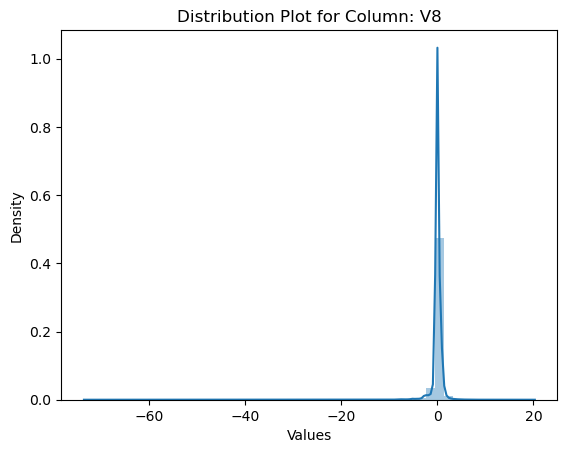

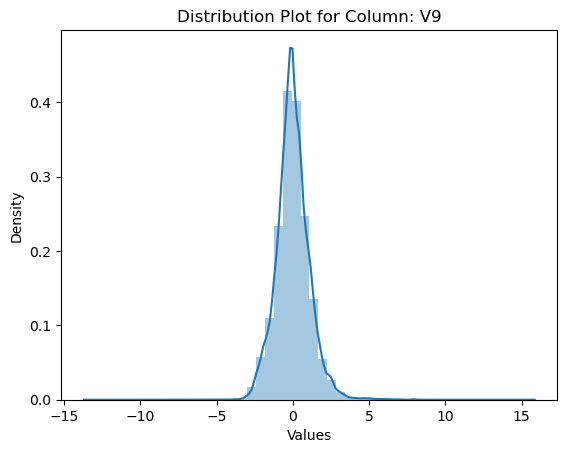

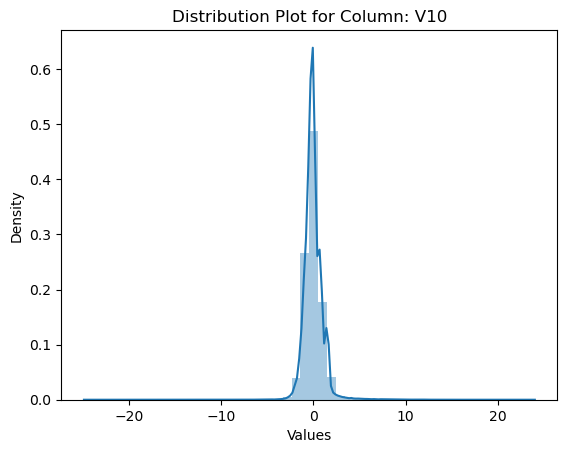

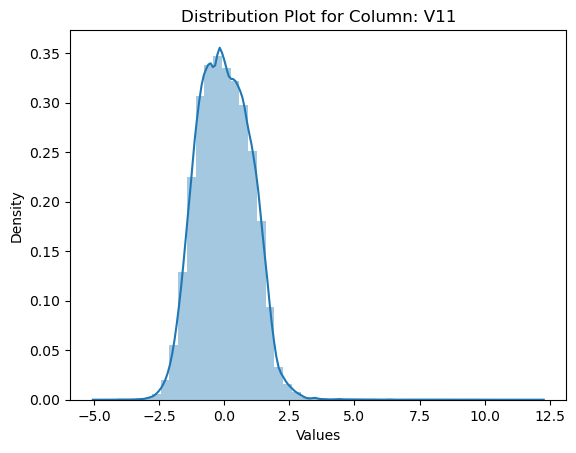

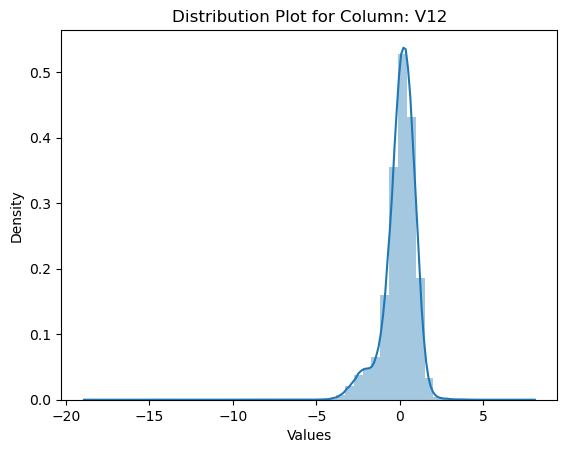

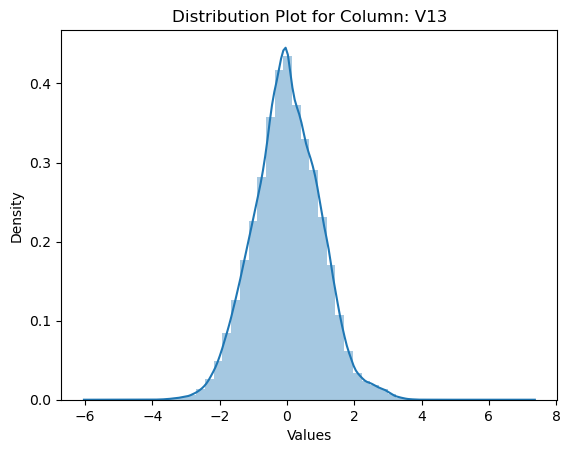

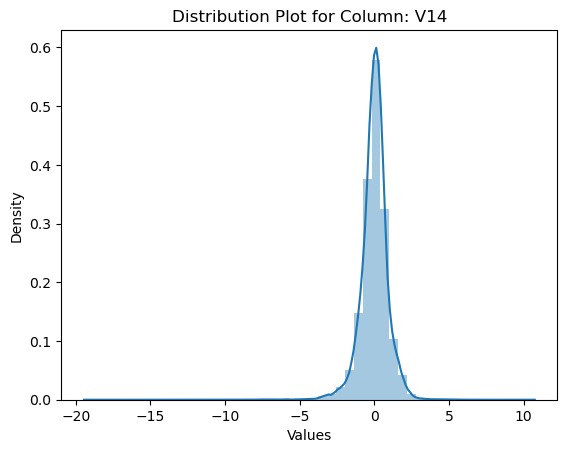

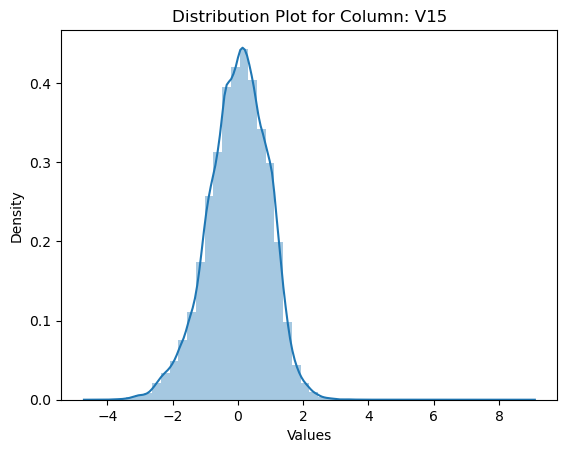

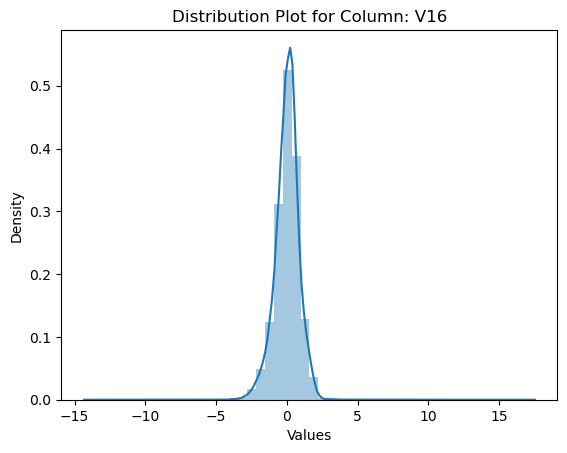

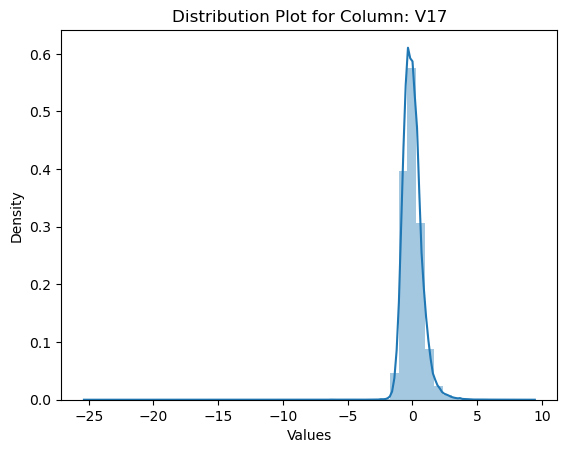

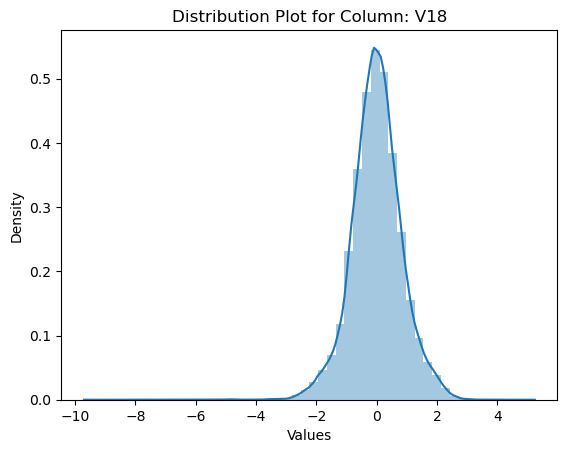

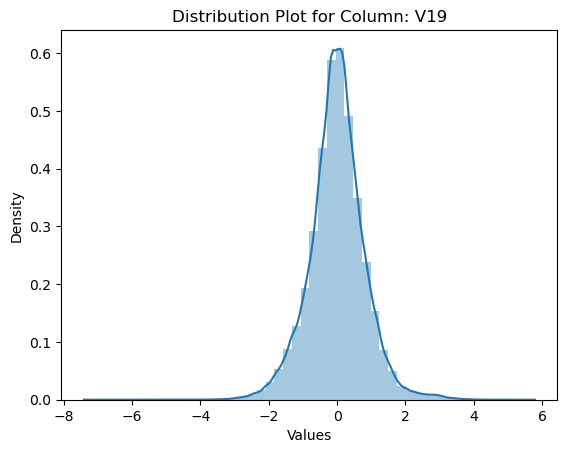

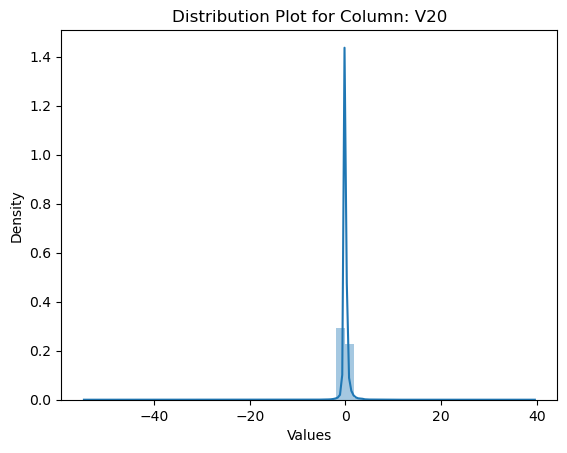

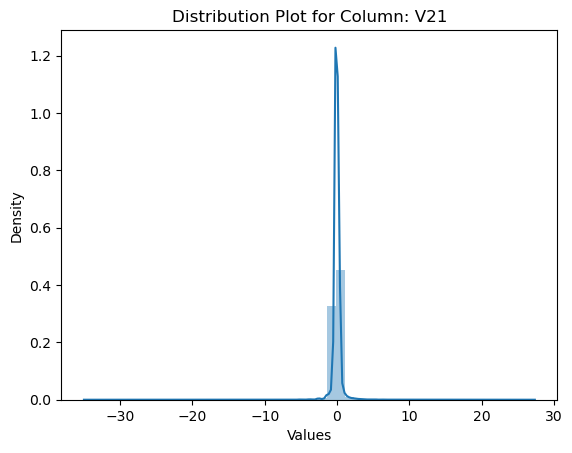

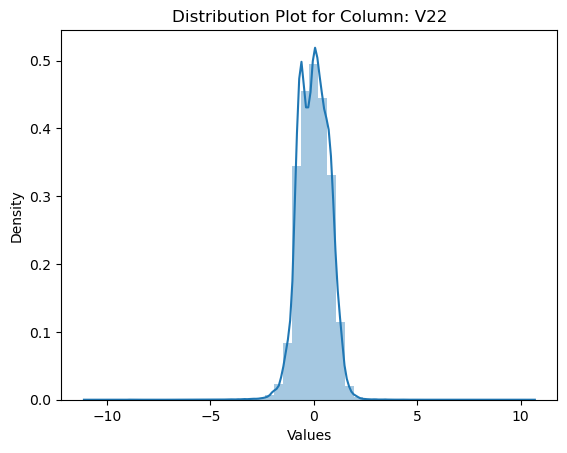

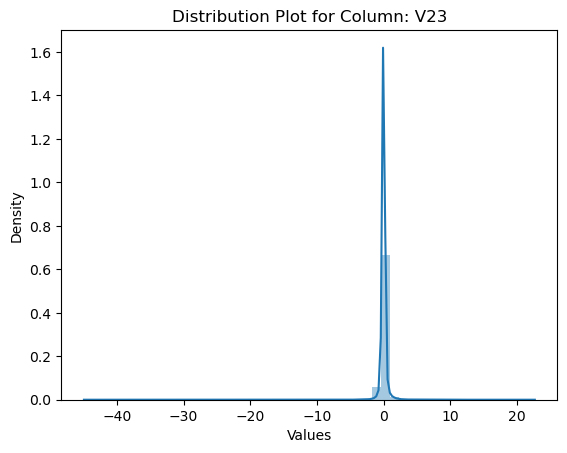

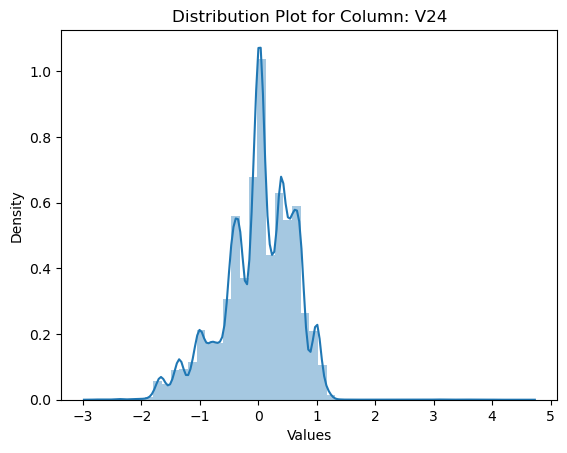

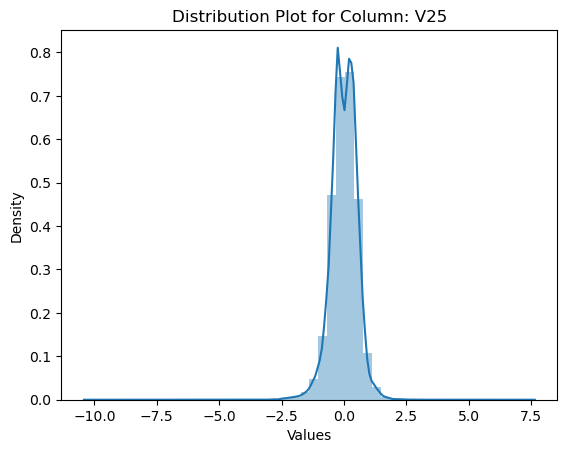

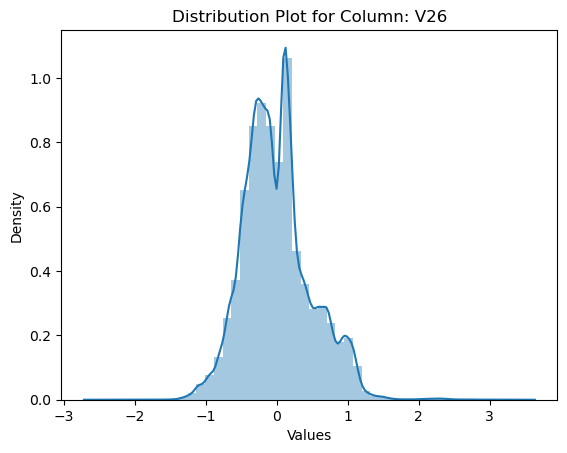

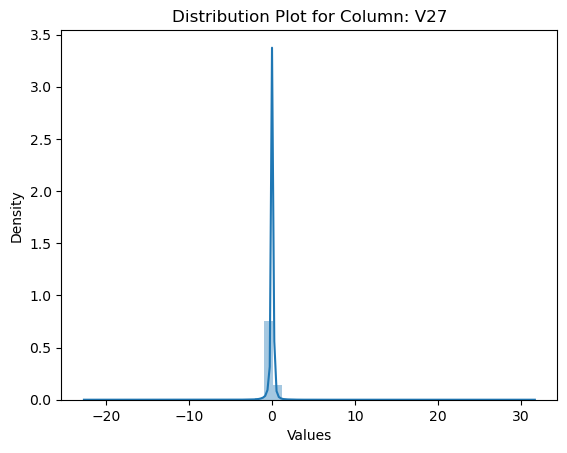

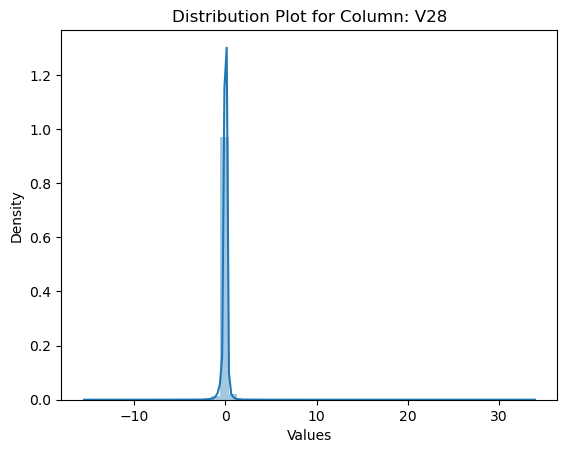

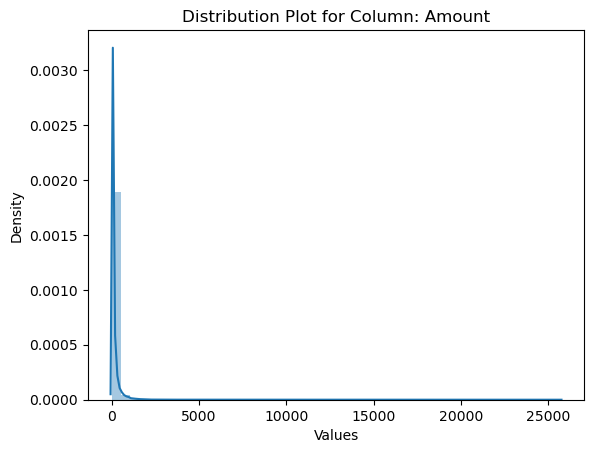

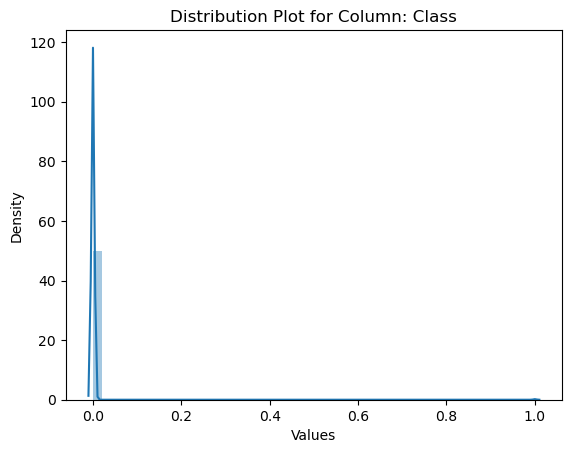

In [7]:
#call our function
display_distribution_plots(df)

In [8]:
#Let us examine the target column
Target = df['Class']

In [9]:
# Here we can see that the dataset is imbalanced in favour of 0 which are non fraudulent transaction we must be careful 
# while training our model so as to not induce bias in the model.
Target.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
# What counts as imbalanced? The answer could range from mild to extreme, as the table below shows.

# Degree of imbalance	Proportion of Minority Class
# Mild	20-40% of the data set
# Moderate	1-20% of the data set
# Extreme	<1% of the data set

# Clearly in this case we are dealing with an extreme Minority Class

# First we will try training on the original distribution. If the model works well and generalizes, we are good! 
# If not, we wil try resampling thr data.

Features = df.drop("Class",axis=1)

In [11]:
# We need to scale the features because they are not all in the same, especially when you consider 'Amount'
scaler = StandardScaler()
scaler.fit(Features)
Features=scaler.transform(Features)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(Features,Target,stratify=Target,test_size=0.3,random_state=27)

In [13]:
#Implement Logistic Regression Model
model=LogisticRegression().fit(X_train,Y_train)

In [14]:
Y_pred = model.predict(X_test)

Training Accuracy:  0.9992024638349953
Testing Accuracy:  0.9992275552122467
Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.62      0.74       148

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443

[[85285    10]
 [   56    92]] : Confusion Matrix


<AxesSubplot:>

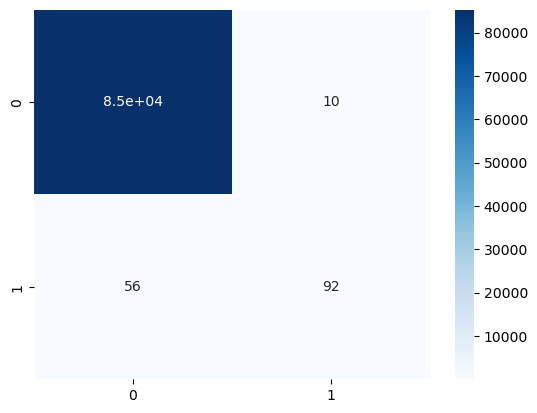

In [15]:
train_acc = accuracy_score(Y_train, model.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test,Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report: ", clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")

In [16]:
# Even though the accuraccy is near perfect the data might be overfitting so will try to resample and try again.
df = pd.read_csv("C:/Users/Aditya/Desktop/BSE PGPDA/SEM 1/Chirag Sir/Fraud Detection Data/archive (7)/creditcard.csv")

In [17]:
# Separate majority and minority classes

df_majority = df[df['Class']==0]
df_minority = df[df['Class']==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=284315, # match number in majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Check class balance
df_upsampled['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [18]:
#We have upsampled our dataset and have nearly doubled the number of sample transactions
df_upsampled.shape

(568630, 31)

# We will reapply the same steps for this Upsampled dataset

In [19]:
upsampled_Target = df_upsampled['Class']

In [20]:
upsampled_Features = df_upsampled.drop("Class",axis=1)

In [21]:
scaler = StandardScaler()
scaler.fit(upsampled_Features)
Features=scaler.transform(upsampled_Features)

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(upsampled_Features,upsampled_Target,test_size=0.3,random_state=27)

In [23]:
model=LogisticRegression().fit(upsampled_Features,upsampled_Target)

In [24]:
Y_pred = model.predict(X_test)

Training Accuracy:  0.9176516991968164
Testing Accuracy:  0.9172045090832351
Classification Report:                precision    recall  f1-score   support

           0       0.89      0.96      0.92     85282
           1       0.95      0.88      0.91     85307

    accuracy                           0.92    170589
   macro avg       0.92      0.92      0.92    170589
weighted avg       0.92      0.92      0.92    170589

[[81583  3699]
 [10425 74882]] : Confusion Matrix


<AxesSubplot:>

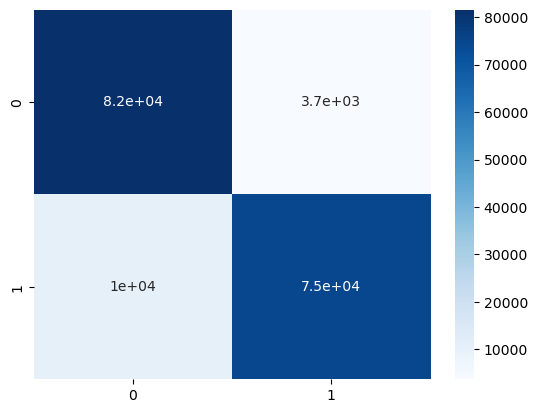

In [25]:
train_acc = accuracy_score(Y_train, model.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test,Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report: ", clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")

In [26]:
prob = model.predict_proba(X_test)[:,0]

In [27]:
tpr,fpr,threshold=roc_curve(Y_test,prob)

In [28]:
auc = roc_auc_score(Y_test,prob)

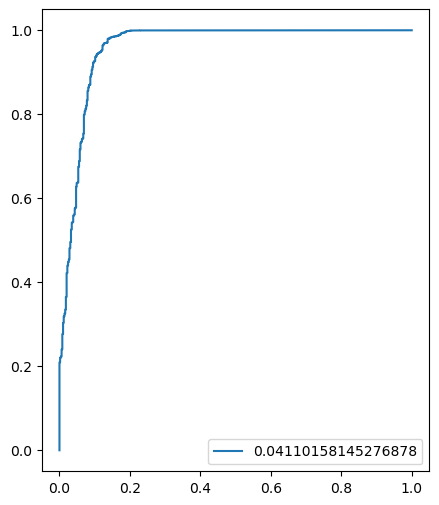

In [30]:
plt.figure(figsize=(5,6))
plt.plot(fpr,tpr,label=str(auc))
plt.legend()
plt.show()

# Downsampling

In [31]:
# Clearly we have lower accuraccy but its still more generalized than the previous model.
#Let us see what happens if we downsample
df = pd.read_csv("C:/Users/Aditya/Desktop/BSE PGPDA/SEM 1/Chirag Sir/Fraud Detection Data/archive (7)/creditcard.csv")

In [32]:
# Separate majority and minority classes
df_majority = df[df['Class']==0]
df_minority = df[df['Class']==1]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=492,    # match number in minority class
                                   random_state=42)  # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Check class balance
df_downsampled['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [33]:
downsampled_Target = df_downsampled['Class']
downsampled_Features = df_downsampled.drop('Class',axis=1)

In [34]:
scaler = StandardScaler()
scaler.fit(downsampled_Features)
Features=scaler.transform(downsampled_Features)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(downsampled_Features,downsampled_Target,test_size=0.3,random_state=27)

In [36]:
model=LogisticRegression().fit(downsampled_Features,downsampled_Target)

In [37]:
Y_pred = model.predict(X_test)

Training Accuracy:  0.9273255813953488
Testing Accuracy:  0.9121621621621622
Classification Report:                precision    recall  f1-score   support

           0       0.89      0.94      0.92       153
           1       0.93      0.88      0.91       143

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296

[[144   9]
 [ 17 126]] : Confusion Matrix


<AxesSubplot:>

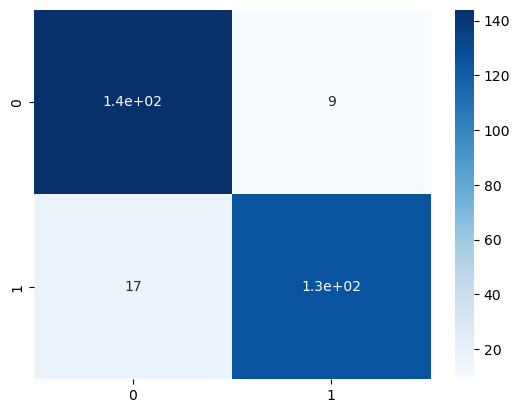

In [38]:
train_acc = accuracy_score(Y_train, model.predict(X_train))
test_acc = accuracy_score(Y_test, Y_pred)
clf_report = classification_report(Y_test, Y_pred)
cm = confusion_matrix(Y_test,Y_pred)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", test_acc)
print("Classification Report: ", clf_report)
print(cm, ": Confusion Matrix")
sns.heatmap(cm, annot=True, cmap="Blues")

In [39]:
prob = model.predict_proba(X_test)[:,0]

In [41]:
tpr,fpr,threshold=roc_curve(Y_test,prob)

In [42]:
auc = roc_auc_score(Y_test,prob)

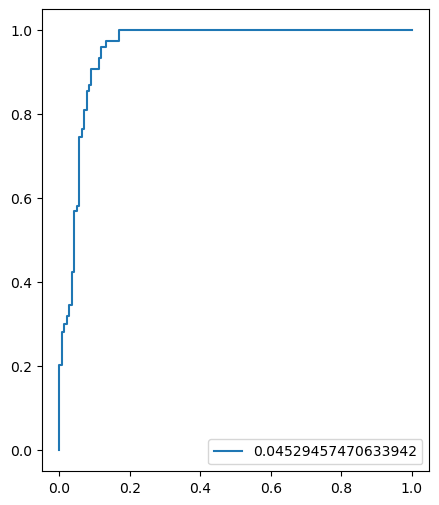

In [43]:
plt.figure(figsize=(5,6))
plt.plot(fpr,tpr,label=str(auc))
plt.legend()
plt.show()

# As we can see that Upsampled data seems to give have a better AUC, we can say that we can predict a a fraudulent transaction with upto 91% accruacy